#開始

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

### グラフ表示

[0.0, 1.0]


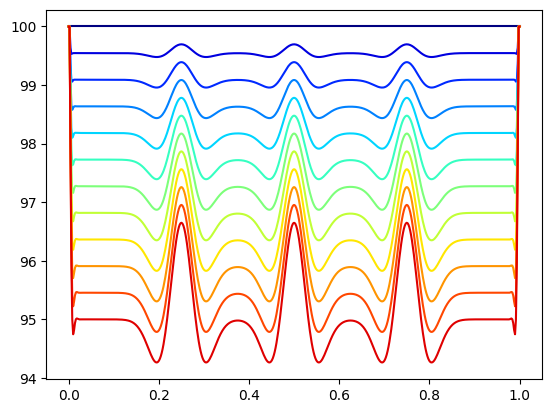

In [103]:
# parameters
t_span = [0.0,1.0]
t_eval = np.linspace(*t_span,12) # time for sampling
# init
nx = 500
x_span = [0.,1.0]
x  = np.linspace(*x_span,nx)
Δx = 1/(nx)
u  =  np.zeros_like(x)
init   = u
k0 = 0.01
h2 = k0*10**(-6)
p0 = k0*0.01/3.0
s = 1+0.0033*np.exp(-500*(x-0.25)**2)+0.0033*np.exp(-500*(x-0.75)**2)+0.0033*np.exp(-500*(x-0.5)**2)#np.cos(50*x)#*
ds =  np.gradient(s, Δx)
dds = np.gradient(ds, Δx)
# ODEs
def ODEs(t,u,Δx):
    du = - k0* 1/2 *dds[2:-2]\
         - k0* h2* 1/3*ds[2:-2]*np.diff(u,3)[1:]/(Δx**3)\
         - k0* h2* 1/3*s[2:-2]*np.diff(u,4)/(Δx**4)\
         + k0* p0* 1/3*s[2:-2]*np.diff(u,2)[1:-1]/(Δx**2)\
         - 0.05
#         - k0* ds[2:-2]*u[2:-2] * np.convolve(u,[3.0,-4.0,1.0],'valid')[1:-1]/(2*Δx)
    return np.hstack([0.,0.,du,0.,0.])
# solve
sol = solve_ivp(ODEs,t_span,init,method="RK45",t_eval=t_eval,args=(Δx,),rtol=1e-8)

cmap = plt.get_cmap('jet')
Np = len(sol.t)
for i in range(Np):
    plt.plot(x,100+100*sol.y[:,i],c=cmap(i/Np))
print(t_span)

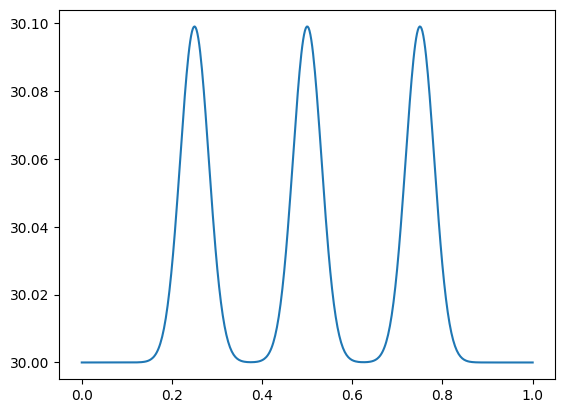

In [101]:
#s = 30*(1+0.0033*np.cos(300*x))
#
plt.plot(x,s*30)
#plt.plot(x,100+100*sol.y[:,i])


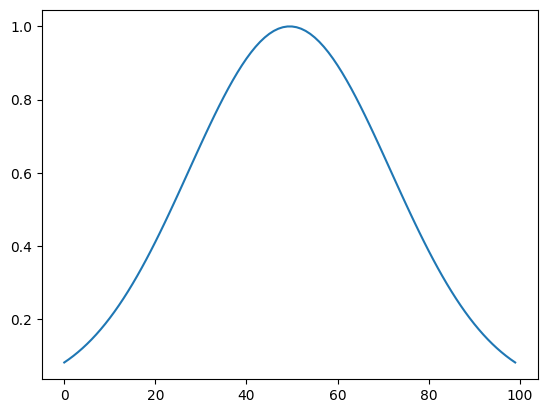

In [ ]:
plt.plot(np.exp(-0.001*(x-50)**2))